# DATASET & DATALOADER

https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader


    در پروژه های یادگیری عمیق، ما با حجم بسیار بالای داده روبرو هستیم. و استفاده کردن از چنین داده ای جهت آموزش یک شبکه عصبی میتواند بسیار سخت و پیچیده باشد. از طرفی کدهای مربوط به پردازش نمونه‌ها و آموزش شبکه عصبی هم میتواند بسیار شلوغ باشد. ما به طور ایده آل دوست داریم، که کد مربوط به آموزش مدل، با کد مربوط به داده جدا باشد تا یک کد خوانا داشته باشیم. پایتورچ برای حل این مسئله دو کلاس دارد که کار با داده را بسیار ساده و راحت می‌کنند

       from torch.utils.data import Dataset,DataLoader
---
## 1. Dataset : 
   
     :یک نمونه از داده و لیبل متناظر با آن را در خود ذخیره می‌کند که شامل سه متد اصلی است

    __init__
    
    در این متد، آماده‌سازی جهت خواندن داده انجام میشه و یه سری شناسه های مرتبط جهت خواندن و تبدیلات داده تعریف می‌شود.
    
    __len__
    
    این متد تعداد نمونه های داده را بر می‌گرداند
    
    __getitem__
        
    این متد، اندیس داده را دریافت کرده و اون داده و به همراه لیبل را خوانده، پیش پردازشهای لازم رو انجام داده و در خروجی قرار میدهد 

    Example:

    class CustomDataset(Dataset):
          def __init__(self,<arguments>):
              pass
          def __len__(self):
              pass
          def __getitem__(self, index):
              pass
---

## 2. DataLoader

    بارگذار داده‌ها برای گردش یا تکرار داده‌ها، مدیریت بچ‌ها، تبدیل داده‌ها و موارد دیگر استفاده شود که دارای سه پارامتر متداول زیر است  
 

    - dataset
  
    مجموعه‌داده که می‌خواهید از آن داده‌ها را بارگذاری کنید.

    - batch_size (int, optional)

    تعداد نمونه‌ها در هر بچ برای بارگذاری (پیش‌فرض: ۱)

    - shuffle (bool, optional) 

    (پیش‌فرض: False) آیا داده‌ها در هر دوره (ایپاک) دوباره مخلوط شوند 


    Example:

    DataLoader(dataset, batch_size=5, shuffle=True)

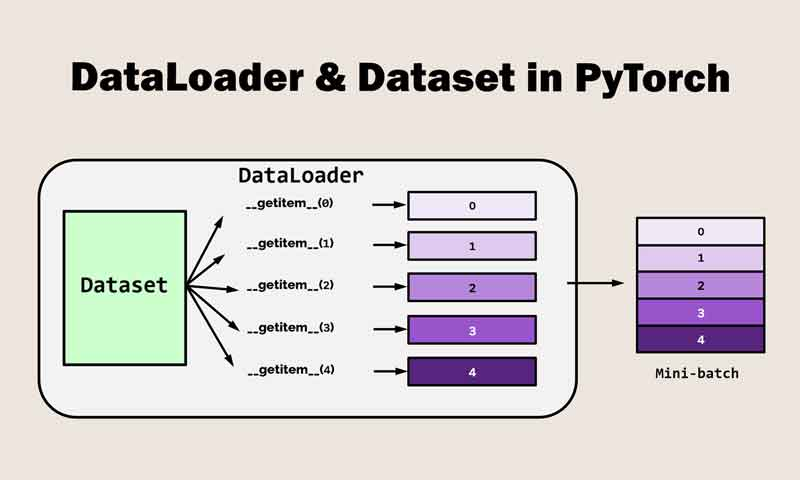

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

### Analyzing Data

In [ ]:
pd_data = pd.read_csv('./wine.csv' )
print('type: ',  pd_data.info())

In [ ]:
pd_data.head()

In [ ]:
np_data = np.loadtxt('./wine.csv',delimiter=',',dtype=str) #
np_data

In [ ]:
class WineDataset(Dataset):
    
    def __init__(self):
        data = np.loadtxt('./wine.csv',delimiter=',',dtype=np.float32,skiprows=1) # numpy.ndarray
        self.n_samples = data.shape[0]

        # note that we convert to tensor from numpy ndarray
        self.x = torch.from_numpy(data[:,1:])
        self.y = torch.from_numpy(data[:,[0]])
        
    def __len__(self):
        return self.n_samples
        
    def __getitem__(self,index):
        data = self.x[index]
        target = self.y[index]
        return data, target

In [ ]:
wine_dataset = WineDataset()

In [ ]:
total_samples = len(wine_dataset) 
total_samples

In [ ]:
wine_dataset[0]

In [ ]:
features, labels = wine_dataset[0]
print('FEATURES: ',features,'\nLABEL: ', labels)

In [ ]:
# for x, y in wine_dataset:
    # print(x,y)

In [ ]:
dataloader = DataLoader(dataset=wine_dataset, batch_size=5,shuffle=True)

In [ ]:
next(iter(dataloader))

In [ ]:
for x, y in dataloader:
    print(x,y)
    break

In [ ]:
num_batches = len(dataloader)
num_batches

In [ ]:
num_epochs = 2
batch_size = 4
total_samples = len(wine_dataset) # 178
n_iterations = len(dataloader) # 45

print('Number of Epoch: ',num_epochs,'\nBatch Size: ',batch_size,'\nTotal Samples: ',total_samples,'\nNumber of Iterations: ',n_iterations,'\n')

for epoch in range(num_epochs):
    print('-'* 50)
    for batch , (inputs,labels) in enumerate(dataloader):
         
        if (batch + 1)% 5 ==0:
            print(f'epoch {epoch+1}/{num_epochs}, iteration {batch+1} of {n_iterations}, inputs {inputs.shape}')

In [ ]:
num_epochs = 2
batch_size = 4
total_samples = len(wine_dataset)  # 178
n_iterations = len(dataloader)  # 45

print('Number of Epoch: ', num_epochs, '\nBatch Size: ', batch_size, '\nTotal Samples: ', total_samples,
      '\nNumber of Iterations: ', n_iterations, '\n')

for epoch in range(num_epochs):
    print('-' * 50)
    for batch in range(n_iterations):
        # Get the next batch of data
        inputs, labels = next(iter(dataloader))

        if (batch + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, iteration {batch + 1} of {n_iterations}, inputs {inputs.shape}')


In [ ]:
#